<a href="https://colab.research.google.com/github/cuccurese2010/Cat-and-Dog-photo-recognize-/blob/main/Copy_of_Dogs_vs_Cats_Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Information

The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels

(1 = dog, 0 = cat).

## Download Dataset

In [ ]:
#Carica il file in Colab che contiene le foto di cani e gatti
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2024-01-26 17:21:51--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 173.222.113.107, 2a02:26f0:6d00:5a2::317f, 2a02:26f0:6d00:5ad::317f, ...
Connecting to download.microsoft.com (download.microsoft.com)|173.222.113.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  93.2MB/s    in 7.7s    

2024-01-26 17:21:58 (102 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



## Unzip the Dataset

In [ ]:
 #Scompatta il file zip appena caricato su Colab
 !unzip kagglecatsanddogs_5340.zip

## Import Modules

In [ ]:
#Importa tutte le librerie che servono ad abilitare le funzionalita' utili per il nostro esercizio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
from google.colab import drive
warnings.filterwarnings('ignore')

## Create Dataframe for Input and Output

In [ ]:
# Importazione del modulo os(import os): Importa il modulo os per interagire con il sistema operativo.
# Questo script classifica i percorsi dove risiedono tutte le immagini e assegna le etichette a tutte le foto. A tutte le foto di Gatti assegna un etichetta numerica 0. A tutte le foto di Cani assegna l'etichetta numerica 1
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Cat/10345.jpg 0


In [ ]:
# Questo script utilizza la libreria pandas per creare un DataFrame (df) a partire dalle liste input_path e label. Successivamente,
# il DataFrame viene mescolato casualmente (sample(frac=1)) e reimpostato per ottenere un ordine casuale. Infine, viene visualizzata l'intestazione (prime righe) del DataFrame risultante.

df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head() # Visualizza le prime cinque righe del DataFrame risultante per fornire una panoramica dei dati mescolati.
# In sintesi, questo script crea un DataFrame contenente i percorsi delle immagini e le etichette, mescola casualmente le righe del DataFrame e mostra le prime righe del DataFrame risultante.

images  label
0  PetImages/Dog/10652.jpg      1
1  PetImages/Cat/11272.jpg      0
2  PetImages/Dog/10000.jpg      1
3   PetImages/Cat/9668.jpg      0
4   PetImages/Cat/3222.jpg      0

In [ ]:
# Questo codice controlla tutti i percorsi delle immagini presenti nella colonna 'images' del DataFrame df.
# Per ciascun percorso, verifica se il termine '.jpg' è presente nel percorso dell'immagine. Se '.jpg' non è presente, il percorso dell'immagine viene stampato.
for i in df['images']:
    if '.jpg' not in i:
        print(i)
# In breve, questo codice è utile per individuare eventuali percorsi di immagini nel DataFrame che non hanno l'estensione '.jpg'. Potrebbe essere utile per identificare errori nei dati o problemi con i percorsi delle immagini.

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [ ]:
# Questo codice utilizza il modulo PIL (Python Imaging Library) per aprire le immagini corrispondenti ai percorsi specificati nella colonna 'images' del DataFrame df.
# L'obiettivo è gestire le eccezioni nel caso in cui ci siano problemi nell'apertura di alcune immagini. Se si verifica un'eccezione durante l'apertura di un'immagine,
# il percorso di quell'immagine viene aggiunto alla lista l. Alla fine, la lista l conterrà i percorsi delle immagini che hanno causato problemi durante l'apertura.
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Dog/11702.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Cat/666.jpg']

In [ ]:
# Questo codice elimina specifici percorsi di immagini dal DataFrame df. In particolare, vengono rimossi i percorsi associati ai file 'Thumbs.db',
# '666.jpg' nella cartella 'Cat', e '11702.jpg' nella cartella 'Dog'. Infine, la lunghezza del DataFrame df viene stampata.
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)
# In sintesi, questo codice pulisce il DataFrame df rimuovendo i percorsi associati a determinati file nelle cartelle 'Dog' e 'Cat', e successivamente stampa la lunghezza del DataFrame risultante.

24998

## Exploratory Data Analysis

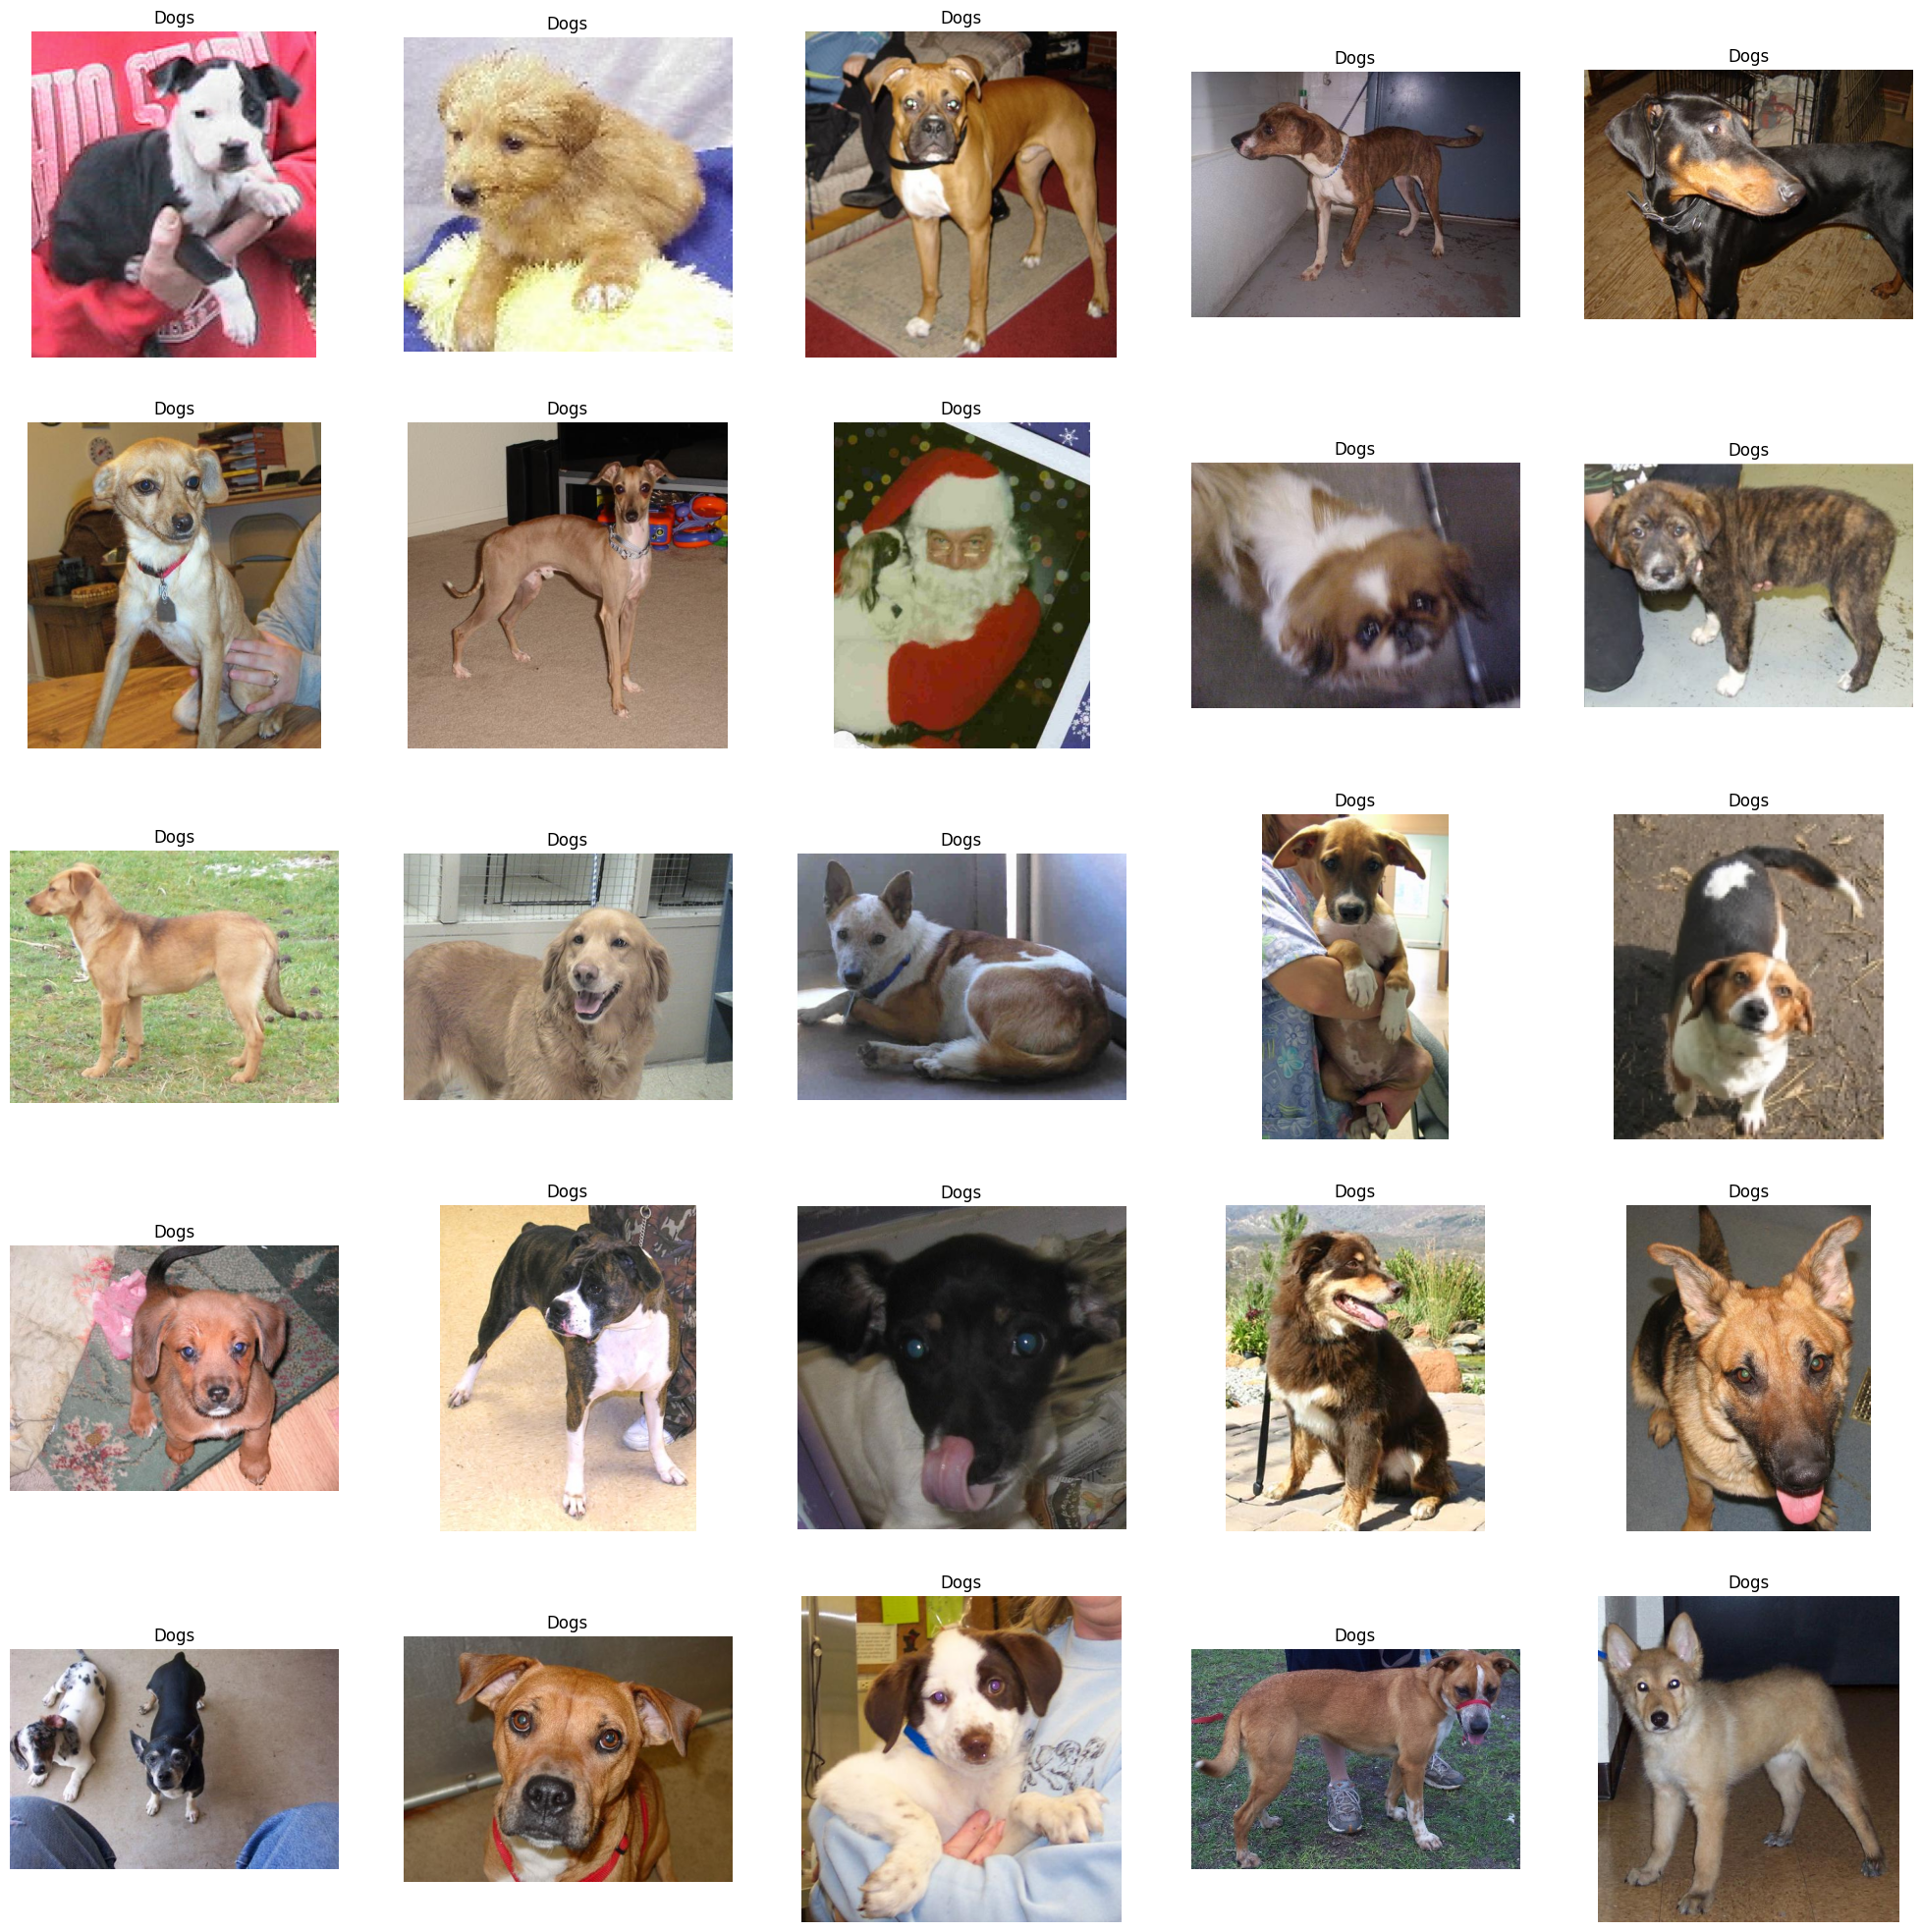

In [ ]:
# Questo codice utilizza la libreria matplotlib.pyplot per visualizzare una griglia di immagini di cani estratte dal DataFrame df. In particolare,
# vengono selezionate casualmente 25 immagini di cani e mostrate in una griglia di subplot.
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')
# In sintesi, questo codice visualizza una griglia di 25 immagini di cani estratte casualmente dal DataFrame df.

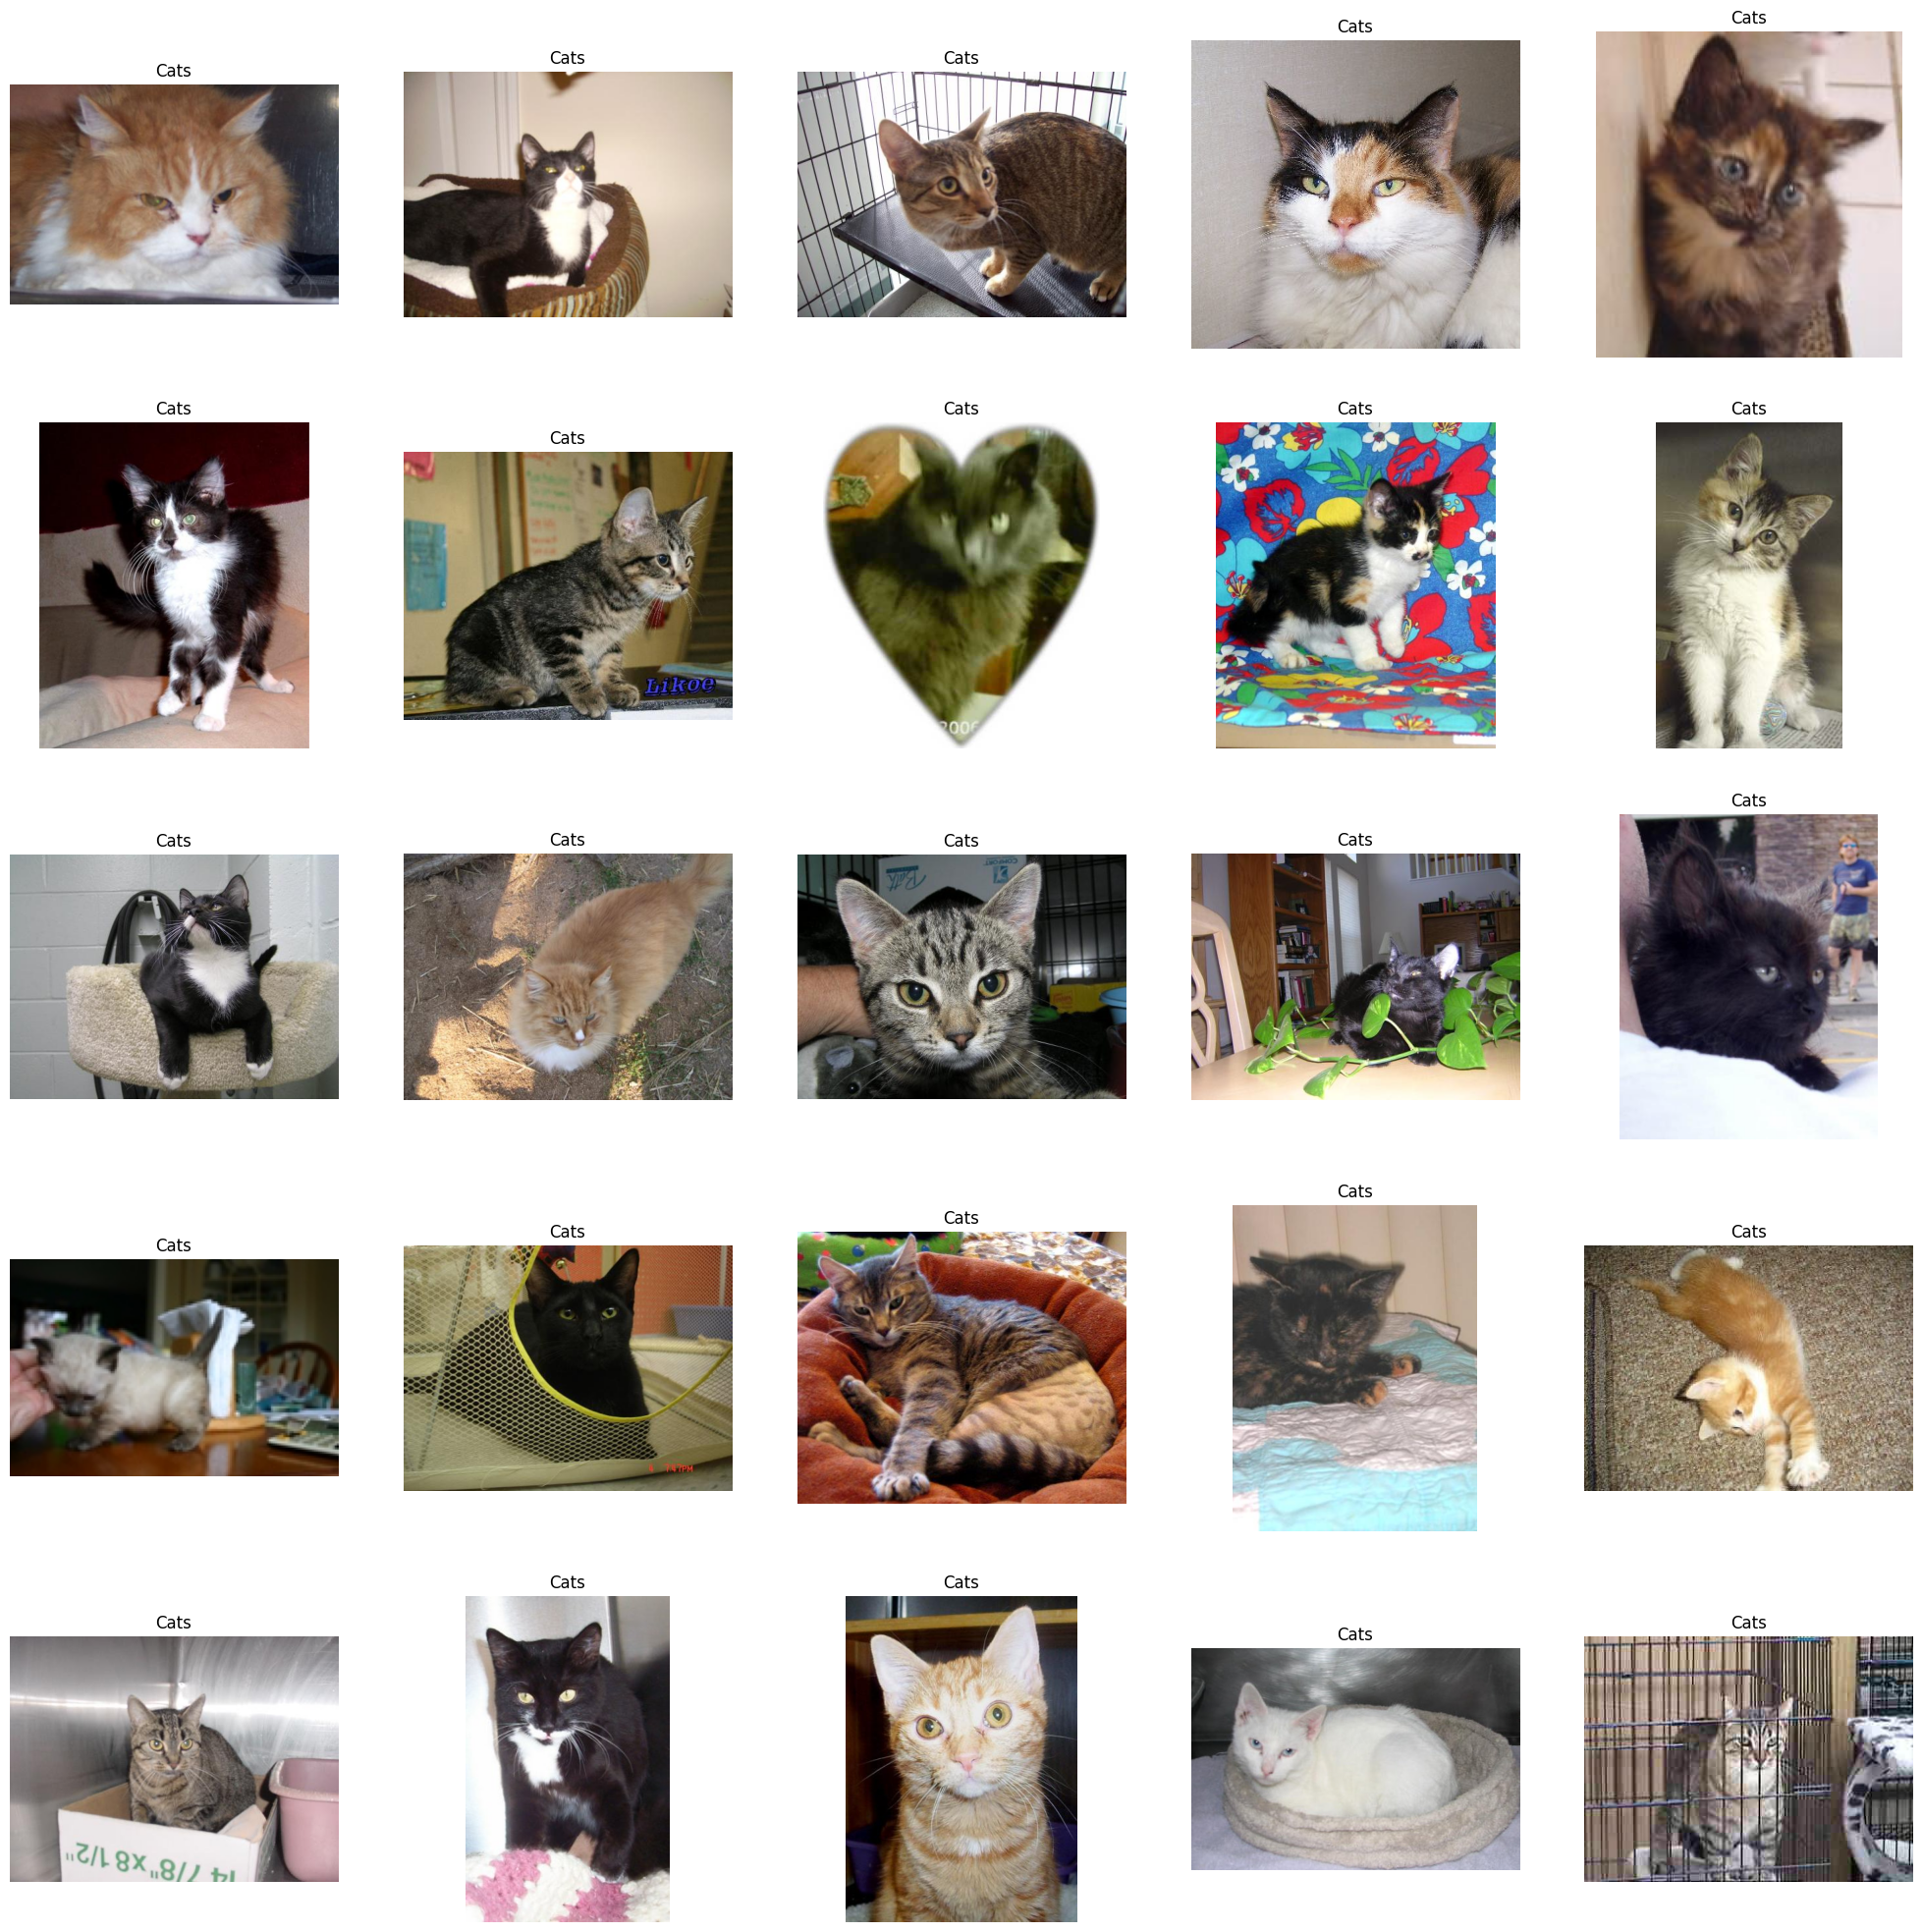

In [ ]:
# Questo codice utilizza la libreria matplotlib.pyplot per visualizzare una griglia di immagini di gatti estratte dal DataFrame df. In particolare,
# vengono selezionate casualmente 25 immagini di gatti e mostrate in una griglia di subplot.
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')
# In sintesi, questo codice visualizza una griglia di 25 immagini di gatti estratte casualmente dal DataFrame df.

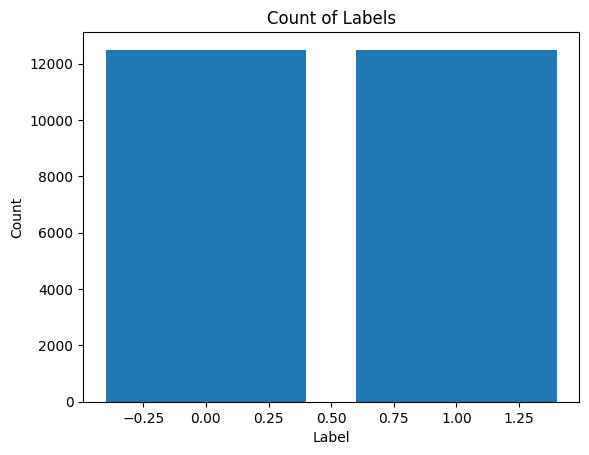

In [ ]:
# Questo codice utilizza la libreria matplotlib per creare un grafico a barre che rappresenta
# il conteggio delle etichette presenti nella colonna 'label' del DataFrame df.
import matplotlib.pyplot as plt

# Creazione di un conteggio grafico delle etichette con matplotlib
plt.bar(df['label'].unique(), df['label'].value_counts())

# Aggiunta di etichette e titoli
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Labels')

# Visualizzazione del grafico
plt.show()
# Questo tipo di grafico è utile per visualizzare la distribuzione delle categorie nelle etichette e ottenere un'idea del bilanciamento o dello sbilanciamento del dataset rispetto alle classi.
# Nel contesto di questo codice, si sta visualizzando il numero di immagini associate a ciascuna etichetta ('Cat' o 'Dog').

## Create DataGenerator for the Images

In [ ]:
# Questo codice converte la colonna 'label' del DataFrame df da tipo di dati numerico a tipo di dati stringa. La funzione astype('str') è utilizzata per effettuare questa conversione.
df['label'] = df['label'].astype('str')
# Quindi, dopo l'esecuzione di questo codice, i valori nella colonna 'label' saranno trattati come stringhe anziché numeri.
# Questo tipo di conversione può essere utile in situazioni in cui si desidera trattare le etichette come stringhe, ad esempio, quando si utilizzano come categorie di un grafico o in altre operazioni specifiche del tipo di dato stringa.

In [ ]:
# La funzione df.head() restituisce le prime cinque righe del DataFrame df.Questo è un modo comune per esaminare rapidamente
# le prime osservazioni di un DataFrame e ottenere un'idea di come sono strutturati i dati. Le prime cinque righe forniscono un'anteprima dei dati presenti nel DataFrame.
df.head()
# La visualizzazione delle prime cinque righe è utile per comprendere rapidamente la struttura dei dati, i tipi di colonna, i valori delle prime osservazioni e altri dettagli iniziali.

images label
0  PetImages/Dog/10652.jpg     1
1  PetImages/Cat/11272.jpg     0
2  PetImages/Dog/10000.jpg     1
3   PetImages/Cat/9668.jpg     0
4   PetImages/Cat/3222.jpg     0

In [ ]:
# Questo codice utilizza la funzione train_test_split dalla libreria scikit-learn per suddividere il DataFrame df in due insiemi:
# un insieme di addestramento (train) e un insieme di test (test).
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)
# Dopo l'esecuzione di questo codice, avrai due DataFrame separati: train contenente l'insieme di addestramento e test contenente l'insieme di test.
# Questo è un passo comune nella preparazione dei dati per l'addestramento e la valutazione di modelli di machine learning.

In [ ]:
# Questo codice utilizza il modulo ImageDataGenerator di Keras per generare iteratori di dati da immagini presenti nei DataFrame train e test.
# Gli iteratori di dati sono utilizzati comunemente nell'addestramento di modelli di deep learning.
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)
# Questi iteratori di dati possono essere utilizzati successivamente per addestrare modelli di deep learning usando la funzione fit_generator di Keras.
# L'augmentazione delle immagini durante l'addestramento può aiutare a migliorare la capacità di generalizzazione del modello per evitare L'overfiting.

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


## Model Creation

In [ ]:
# Questo codice definisce un modello di rete neurale convoluzionale (CNN) utilizzando il modulo Sequential di Keras. La CNN è progettata per la classificazione binaria,
# con un'architettura composta da strati convoluzionali, strati di max pooling, uno strato di flattening e strati completamente connessi (Dense).
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])
# In sintesi, il modello è progettato per apprendere gerarchie di features dalle immagini attraverso i livelli convoluzionali e
# quindi utilizzare queste features per la classificazione binaria tramite i livelli completamente connessi.

In [ ]:
# Questo codice definisce la configurazione del processo di addestramento del modello e visualizza un riepilogo dell'architettura del modello.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# In sintesi, questa parte di codice prepara il modello per l'addestramento specificando l'ottimizzatore,
# la funzione di perdita e le metriche di valutazione. Successivamente, viene visualizzato un riepilogo dell'architettura del modello.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [ ]:
# Il codice drive.mount('/content/drive') è una parte comune di codice quando si utilizza l'ambiente di sviluppo Google Colab (Colaboratory), che consente di montare
# Google Drive all'interno dell'ambiente Colab. Questo codice fa parte della libreria Google Colab e permette di accedere ai file memorizzati su Google Drive direttamente dall'ambiente di Colab.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Questo codice addestra il modello usando l'iteratore di dati train_iterator per 10 epoche, utilizzando i dati di validazione forniti dall'iteratore val_iterator. Successivamente,
# salva il modello addestrato in un file denominato "Cat_vs_dogs_classification.h5" e salva la cronologia dell'addestramento in un file JSON chiamato "history.json".
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)
#Salva il modello
model.save('/content/drive/MyDrive/Cat_vs_dogs_classification.h5')
# Salvataggio della history in un file JSON
import json
history_dict = history.history
history_json = json.dumps(history_dict)

with open('/content/drive/MyDrive/history.json', 'w') as json_file:
    json_file.write(history_json)
# Questi passaggi sono comuni quando si addestra un modello e si
# desidera salvare sia il modello addestrato che la cronologia dell'addestramento per analisi successive o per riprendere l'addestramento in futuro.

Epoch 1/10
40/40 [==============================] - 116s 3s/step - loss: 0.6203 - accuracy: 0.6537 - val_loss: 0.5893 - val_accuracy: 0.6768
Epoch 2/10
40/40 [==============================] - 116s 3s/step - loss: 0.5832 - accuracy: 0.6867 - val_loss: 0.5676 - val_accuracy: 0.7038
Epoch 3/10
40/40 [==============================] - 115s 3s/step - loss: 0.5676 - accuracy: 0.7041 - val_loss: 0.5242 - val_accuracy: 0.7386
Epoch 4/10
40/40 [==============================] - 115s 3s/step - loss: 0.5468 - accuracy: 0.7224 - val_loss: 0.5068 - val_accuracy: 0.7508
Epoch 5/10
40/40 [==============================] - 115s 3s/step - loss: 0.5272 - accuracy: 0.7347 - val_loss: 0.4944 - val_accuracy: 0.7632
Epoch 6/10
40/40 [==============================] - 114s 3s/step - loss: 0.5359 - accuracy: 0.7284 - val_loss: 0.4788 - val_accuracy: 0.7728
Epoch 7/10
40/40 [==============================] - 115s 3s/step - loss: 0.5108 - accuracy: 0.7432 - val_loss: 0.4747 - val_accuracy: 0.7796
Epoch 8/10
40

## Visualization of Results

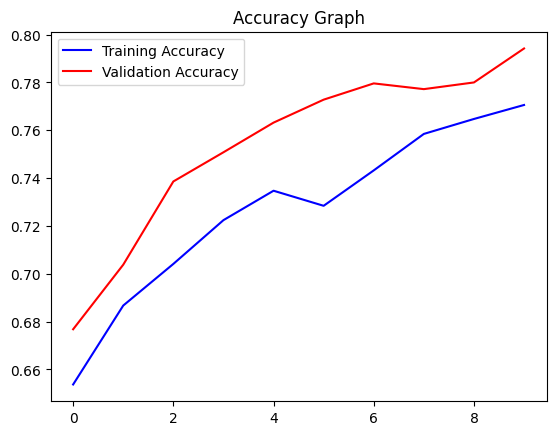

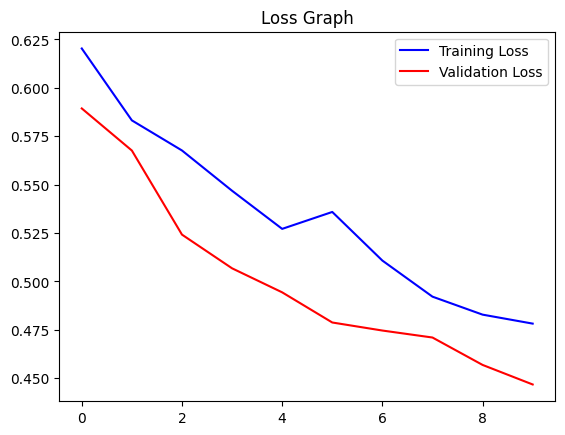

In [ ]:
# Questo codice genera due grafici per visualizzare le metriche di addestramento e validazione (accuracy e loss) nel corso delle epoche.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()
# Questi grafici sono utili per valutare le prestazioni del modello durante l'addestramento, identificando eventuali problemi di overfitting o underfitting.

## Test with Real Image

In [ ]:
# Questo codice effettua la previsione di una singola immagine utilizzando un modello di classificazione di immagini, e quindi determina se l'immagine rappresenta un cane o un gatto.
image_path = "cat.18.jpg" # path of the image
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 128, 128, 3) # reshape for prediction
pred = model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)
# In sintesi, il codice utilizza il modello per prevedere se un'immagine rappresenta un cane o un gatto e stampa il risultato.